In [1]:
from helper import (load_data, token, DanishCleaner,
                    show_diagram, show_most_informative_features)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (15,5)
plt.style.use('fivethirtyeight') # plt.style.available

In [1]:
from sklearn.externals import joblib
from sklearn.model_selection import (train_test_split, KFold,
                                     cross_val_score)
from sklearn.feature_extraction.text import (TfidfVectorizer, CountVectorizer

In [27]:


from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.pipeline import make_pipeline, FeatureUnion, Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [5]:
stops = joblib.load('../stops.pkl')

Loading data ...
Droping 10 rows with features lenght of less than 2
Droping 3 as rating and setting 1-2 as negative(0), 4-5 as positive(1))
{1: 460527, 0: 127232} 

Down sampling positive ratings to match negatives
Data loading completed
{1: 127232, 0: 127232} 



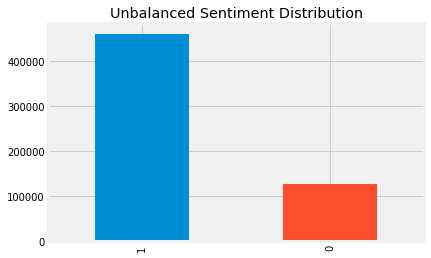

In [6]:
df = load_data('../sentiment_data', balanced=True)

In [7]:
df.head()

In [29]:

def train_model(clf, X, y, clf_parameters=None, tfidf_parameters=None, 
                  tt_split=.2, random_state=7, stratify=True):
    if stratify:
        ys = y
    else:
        ys = None
        
    print('Model: {}\nModel Parameters: {}\nTerm Frequence IDF:{}\nAdd more'.format(clf,clf_parameters, tfidf_parameters))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=tt_split, random_state=random_state,stratify=ys)
    
    
    clf  = Pipeline(steps=[
                          ('tfidf',  TfidfVectorizer(**tfidf_parameters)),
                          ('fe_se', SelectKBest(chi2, k=50000)),
                          ('clf', clf(**clf_parameters))
                          ]
                   )
    clf.fit(X_train, y_train)
    
    show_diagram(clf, X_train, y_train, X_test, y_test, compare_test=True)
    
    return clf
    
      

In [ ]:
tfidf_para = dict(stop_words = stops, ngram_range=(2, 3), max_features=100000,
                  tokenizer=token, min_df=10, max_df=.9, smooth_idf=1, sublinear_tf=1)

logitcv_para = dict(Cs=10,  cv=5, penalty='l', scoring='accuracy', solver='saga', max_iter=200,
                    n_jobs=-1, verbose=1, refit=True, intercept_scaling=1.0, random_state=7)

In [30]:
logcv = train_model(LogisticRegressionCV, df.features, df.y, clf_parameters=logitcv_para, tfidf_parameters=tfidf_para)

Model: <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>
Model Parameters: {'Cs': 10, 'cv': 5, 'penalty': 'l', 'scoring': 'accuracy', 'solver': 'saga', 'max_iter': 100, 'n_jobs': -1, 'verbose': 1, 'refit': True, 'intercept_scaling': 1.0, 'random_state': 7}
Term Frequence IDF:{'stop_words': {'bliver', 'dog', 'os', 'er', 'dine', 'før', 'de', 'hver', 'ham', 'næsten', 'begge', 'vores', 'fra', 'nej', 'lidt', 'at', 'min', 'ind', 'han', 'far', 'mine', 'ni', 'tre', 'om', 'denne', 'skal', 'lad', 'sine', 'ny', 'nyt', 'skulle', 'to', 'vil', 'flere', 'meget', 'lille', 'også', 'tage', 'andet', 'jeres', 'på', 'hvilken', 'den', 'får', 'mod', 'hun', 'kom', 'når', 'blive', 'postnord', 'deres', 'sådan', 'fik', 'bestilte', 'anden', 'sin', 'af', 'ved', 'enhver', 'ej', 'ene', 'lav', 'disse', 'pakker', 'dit', 'få', 'havde', 'næste', 'thi', 'jeg', 'da', 'så', 'må', 'have', 'ses', 'et', 'sig', 'service', 'fem', 'end', 'nogle', 'kun', 'andre', 'hvor', 'dem', 'hvornår', 'hvem', 'bestil', 'ser', 'op',

c:\users\danpra\.virtualenvs\pydatacph-5oqnn_ow\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 371 seconds
max_iter reached after 372 seconds
max_iter reached after 376 seconds
max_iter reached after 313 seconds
max_iter reached after 319 seconds
max_iter reached after 319 seconds
max_iter reached after 316 seconds
max_iter reached after 342 seconds
max_iter reached after 341 seconds
max_iter reached after 342 seconds
max_iter reached after 341 seconds
max_iter reached after 374 seconds
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescalin

KeyboardInterrupt: 

In [8]:
#Splict data into 90 training and 10 testing
X_train, X_test, y_train, y_test = train_test_split(df.features, df.y,
                                                    test_size=0.1, random_state= 7)

In [9]:
count_para = dict(ngram_range=(2, 3),tokenizer=token,
                     lowercase=True,stop_words=stops,min_df=10)

lda_para = dict(n_components=2, max_iter=50, learning_method='online', verbose=1,
                learning_offset=50.,doc_topic_prior=.1, topic_word_prior=.01,random_state=7)

logit_para = dict(C=1., penalty='l2', random_state=0,verbose=1, solver='saga', n_job=1 )  #n_jobs=-1 does not have any effect when solver is liblinear l2

In [10]:
model = Pipeline ([
    ('text_union', FeatureUnion([
                        ('lda_pipe', Pipeline([
                            ('countvec', CountVectorizer(**count_para)),
                            ('lda',LatentDirichletAllocation(**lda_para))
                                            ])),
                        ('tfidf', TfidfVectorizer(strip_accents='unicode', min_df=10, ngram_range=(1, 2)))
                                ])
    ),
    ('clf', LogisticRegression(**logit_para))
    
])

In [11]:
import time

In [12]:
s = time.time()
model.fit(X_train, y_train)
v = time.time()

c:\users\danpra\.virtualenvs\pydatacph-5oqnn_ow\lib\site-packages\sklearn\linear_model\logistic.py:1232: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

In [ ]:
(v-s)/60

In [18]:
show_diagram(model,X_train, y_train, X_test, y_test)

Classification Report
	 _____________________________________________
             precision    recall  f1-score   support

   Negative       0.94      0.96      0.95     12723
   Positive       0.96      0.94      0.95     12724

avg / total       0.95      0.95      0.95     25447

	 _____________________________________________ 




NameError: name 'plt' is not defined

In [ ]:
dir(model.steps[0][1])

In [ ]:
dir(model.steps[0][1].transformer_list[0][1].steps[0][1])

In [ ]:
model.steps[0][1].transformer_list[0][1].steps[0][1].get_feature_names()

In [ ]:
feature_names = model.steps[0][1].transformer_list[0][1].steps[0][1].get_feature_names()
clf = model.steps[1][1]

In [ ]:
show_most_informative_features(clf=clf,feature_names=feature_names, n=100)

In [ ]:
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features
                                 ,stop_words=stop_words_
                                  )

In [ ]:
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)

nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)

In [ ]:
lr_clf  = Pipeline(memory=None,
         steps=[
        ('vec',  CountVectorizer(ngram_range=(1, 3), max_features=100000)),
        ('fe_se', SelectKBest(chi2, k=50000)),
        ('tfidf', TfidfTransformer()),
        ('clf', LogisticRegressionCV(n_jobs=-1,verbose=1))
         ])

pe_clf  = Pipeline(memory=None,
         steps=[
        ('tfid',  TfidfVectorizer(ngram_range=(1, 2), max_features=100000)),
        ('fe_se', SelectKBest(chi2, k=50000)),
        ('tfidf', TfidfTransformer()),
        ('clf', Perceptron(n_jobs=-1,verbose=1))
         ])

In [ ]:
print(metrics.classification_report(y_test, lr_clf.predict(X_test),target_names=['Negative','Positive']))